In [1]:
#0: imports

import uproot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from dataAnalyse import CCV1
from torch_geometric.data import DataLoader 
from torch_geometric.nn import knn_graph

import numpy as np
import time
from Imports import Aggloremative, calculate_reco_to_sim_score, calculate_sim_to_reco_score, calculate_all_event_scores

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
#1: Load Data + Model
#1.1: Load Data Through the dataloader - used for predictions
testpath = "/vols/cms/mm1221/Data/le2pi/"
data_test = CCV1(testpath, max_events=10000, inp = 'test')
test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])



### Loading tracksters data


  0%|                                                                                                                                                                                 | 0/1 [00:00<?, ?it/s]

/vols/cms/mm1221/Data/le2pi/raw/step3_NTUPLE.root


  0%|                                                                                                                                                                                 | 0/1 [01:20<?, ?it/s]

Reached 10000 events!



/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [4]:
# load the model 
from model import Net
model = Net(
    hidden_dim=128,
    num_layers=4,
    dropout=0.3,
    contrastive_dim=16
)


#checkpoint= torch.load('/vols/cms/mm1221/hgcal/elec5New/Track/NegativeMining/resultslr5t54SECEXT/best_model.pt',  map_location=torch.device('cpu'))
checkpoint= torch.load('/vols/cms/mm1221/hgcal/pion5New/Track/NegativeMining/resultsSECNeg/best_model.pt',  map_location=torch.device('cpu'))

model.load_state_dict(checkpoint)  
model.eval()  

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=16, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-3): 4 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
  )
)

In [25]:

#3: Make Predictions + Cluster -> Calculate the inference time
#3.1: Make Predictions

all_predictions = []  
total_times = []
start_time = time.time()

for i, data in enumerate(data_test):
    if i>2000:
        break
    print(i)
    edge_index = knn_graph(data.x, k=16)  
    predictions = model(data.x, edge_index, 1)
    all_predictions.append(predictions[0].detach().cpu().numpy())  

all_predictions = np.array(all_predictions)

#3.2: Cluster using threshold found in Script A

all_cluster_labels = Aggloremative(all_predictions, threshold = 0.14)

end_time = time.time()

#3.3: Calculate average inference time

time_diff = end_time - start_time
inference_time = time_diff/len(all_cluster_labels)
print("average inference time:", inference_time)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
average inference time: 1.135215051766338


In [14]:
# Also load explicitely, used for analysis and plots
data_path = '/vols/cms/mm1221/Data/le2pi/raw/step3_NTUPLE.root'
data_file = uproot.open(data_path)

ass = data_file['ticlDumper/associations;1']['tsCLUE3D_recoToSim_CP'].array()
Track_ind = data_file['ticlDumper/tracksters;1']['vertices_indexes'].array()
GT_ind = data_file['ticlDumper/simtrackstersCP;1']['vertices_indexes'].array()
GT_mult = data_file['ticlDumper/simtrackstersCP;1']['vertices_multiplicity'].array()
energies = data_file['ticlDumper/clusters;1']['energy'].array()
MT_ind = data_file['ticlDumper/trackstersMerged;1']['vertices_indexes'].array()
ass = data_file['ticlDumper/associations;1']['tsCLUE3D_recoToSim_CP'].array()

TrueEnergy = data_file['ticlDumper/simtrackstersCP;1']['regressed_energy'].array()

skim_mask = []
for e in GT_ind:
    if 1 <= len(e) :
        skim_mask.append(True)
    else:
        skim_mask.append(False)
        
ass = ass[skim_mask]
Track_ind = Track_ind[skim_mask]
GT_ind = GT_ind[skim_mask]
GT_mult = GT_mult[skim_mask]
energies = energies[skim_mask]
MT_ind = MT_ind[skim_mask]
TrueEnergy = TrueEnergy[skim_mask]

skim_mask = []
for e in ass:
    if 2 <= len(e):
        skim_mask.append(True)
    else:
        skim_mask.append(False)

ass = ass[skim_mask]
Track_ind = Track_ind[skim_mask]
GT_ind = GT_ind[skim_mask]
GT_mult = GT_mult[skim_mask]
energies = energies[skim_mask]
MT_ind = MT_ind[skim_mask]
TrueEnergy = TrueEnergy[skim_mask]




In [15]:
print(len(Track_ind))
print(len(all_cluster_labels))

10700
201


In [26]:
#4: Calculate Scores and create DF for our model and TICL

#4.1: Turn the cluster labels into our reconstructed tracksters

recon_ind = []

for event_idx, labels in enumerate(all_cluster_labels):
    print(event_idx)
    event_clusters = {} 
    
    for cluster_idx, cluster_label in enumerate(labels):
        if cluster_label not in event_clusters:
            event_clusters[cluster_label] = []
        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])
    
    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])

#4.2 Make DF from our model and CERN


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


In [17]:
import awkward as ak

def filter_repeated_indexes(GT_ind, GT_mult):
    """
    Given:
       - GT_ind: an awkward array (or list of lists) of indexes for one event.
       - GT_mult: an awkward array (or list of lists) of multiplicity values (same shape as GT_ind).
    
    For any index that appears in more than one sub-array, keep only the occurrence with the
    smallest multiplicity, and set that multiplicity to 1.0. All other occurrences are removed.
    
    Returns:
       new_GT_ind, new_GT_mult  
         Both are returned as <class 'awkward.highlevel.Array'>.
    """
    # 1. Record all occurrences of each index.
    occurrences = {}
    for sub_i, (sub_ind, sub_mult) in enumerate(zip(GT_ind, GT_mult)):
        for pos, (val, mult) in enumerate(zip(sub_ind, sub_mult)):
            occurrences.setdefault(val, []).append((sub_i, pos, mult))
    
    # 2. Mark occurrences to remove and those to update.
    removals = set()
    update_to_one = set()
    
    for index_val, occ_list in occurrences.items():
        if len(occ_list) > 1:
            occ_list_sorted = sorted(occ_list, key=lambda x: x[2])  # Sort by multiplicity
            kept_occ = occ_list_sorted[0]  # Keep lowest multiplicity
            update_to_one.add((kept_occ[0], kept_occ[1]))
            for occ in occ_list_sorted[1:]:
                removals.add((occ[0], occ[1]))
    
    # 3. Reconstruct new GT_ind and GT_mult by filtering out the removals.
    new_GT_ind = []
    new_GT_mult = []
    for sub_i, (sub_ind, sub_mult) in enumerate(zip(GT_ind, GT_mult)):
        new_sub_ind = []
        new_sub_mult = []
        for pos, (val, mult) in enumerate(zip(sub_ind, sub_mult)):
            if (sub_i, pos) in removals:
                continue
            new_sub_ind.append(val)
            new_sub_mult.append(1.0 if (sub_i, pos) in update_to_one else mult)
        new_GT_ind.append(new_sub_ind)
        new_GT_mult.append(new_sub_mult)
    
    # Convert lists to awkward arrays
    return ak.Array(new_GT_ind), ak.Array(new_GT_mult)

def filter_repeated_indexes_for_events(all_GT_ind, all_GT_mult):
    """
    Given a list of events, each with its GT_ind and GT_mult (lists of sub-arrays),
    apply filter_repeated_indexes to each event.
    
    Args:
        all_GT_ind: List of events. Each event is an awkward array (or list of sub-arrays) of indexes.
        all_GT_mult: List of events. Each event is an awkward array (or list of sub-arrays) of multiplicity values.
    
    Returns:
        new_all_GT_ind, new_all_GT_mult: Awkward arrays (one per event) of filtered GT_ind and GT_mult.
    """
    new_all_GT_ind = []
    new_all_GT_mult = []
    
    # Loop over each event
    for event_ind, event_mult in zip(all_GT_ind, all_GT_mult):
        new_event_ind, new_event_mult = filter_repeated_indexes(event_ind, event_mult)
        new_all_GT_ind.append(new_event_ind)
        new_all_GT_mult.append(new_event_mult)
    
    # Convert to awkward arrays
    return ak.Array(new_all_GT_ind), ak.Array(new_all_GT_mult)


In [18]:
GT_ind, GT_mult = filter_repeated_indexes_for_events(GT_ind, GT_mult)

In [19]:
import awkward as ak

# Create new lists to store the filtered results
# This makes sure GT_ind, MT_ind, Recon_ind have the same indices
filtered_GT_ind = []
filtered_GT_mult = []
filtered_MT_ind = []


for event_idx, track_indices in enumerate(Track_ind):
    # Flatten the current event's track indices and convert to a set
    track_flat = set(ak.flatten(track_indices).tolist())  # Ensure it contains only integers
    
    # Filter GT_ind and GT_mult for the current event, preserving structure
    event_GT_ind = GT_ind[event_idx]
    event_GT_mult = GT_mult[event_idx]
    filtered_event_GT_ind = []
    filtered_event_GT_mult = []
    for sublist_ind, sublist_mult in zip(event_GT_ind, event_GT_mult):
        filtered_sublist_ind = [idx for idx in sublist_ind if idx in track_flat]
        filtered_sublist_mult = [mult for idx, mult in zip(sublist_ind, sublist_mult) if idx in track_flat]
        filtered_event_GT_ind.append(filtered_sublist_ind)
        filtered_event_GT_mult.append(filtered_sublist_mult)

    # Filter MT_ind for the current event, preserving structure
    event_MT_ind = MT_ind[event_idx]
    filtered_event_MT_ind = []
    for sublist in event_MT_ind:
        filtered_sublist = [idx for idx in sublist if idx in track_flat]
        filtered_event_MT_ind.append(filtered_sublist)

    # Append filtered results
    filtered_GT_ind.append(filtered_event_GT_ind)
    filtered_GT_mult.append(filtered_event_GT_mult)
    filtered_MT_ind.append(filtered_event_MT_ind)

# Convert the filtered results back to awkward arrays
GT_ind_filt = ak.Array(filtered_GT_ind)
GT_mult_filt = ak.Array(filtered_GT_mult)
MT_ind_filt = ak.Array(filtered_MT_ind)


In [20]:
import numpy as np
import pandas as pd
from tqdm import tqdm  # For progress bar

def calculate_all_event_scores(GT_ind, energies, recon_ind, RegressedEnergy, multi, num_events = 100):
    """
    Calculate sim-to-reco and reco-to-sim scores for all CaloParticle and ReconstructedTrackster combinations across all events.

    Parameters:
    - GT_ind: List of CaloParticle indices for all events.
    - energies: List of energy arrays for all events.
    - recon_ind: List of ReconstructedTrackster indices for all events.
    - LC_x, LC_y, LC_z, LC_eta: Lists of x, y, z positions and eta values for all DetIds across events.

    Returns:
    - DataFrame containing scores and additional features for each CaloParticle-Trackster combination across all events.
    """
    # Initialize an empty list to store results
    all_results = []

    # Loop over all events with a progress bar
    for event_index in tqdm(range(num_events)):
        caloparticles = GT_ind[event_index]  # Indices for all CaloParticles in the event
        tracksters = recon_ind[event_index]  # Indices for all ReconstructedTracksters in the event
        event_energies = energies[event_index]  # Energies for this event
        TrueEnergy = round(RegressedEnergy[event_index][0])
        trackster_det_id_sets = [set(trackster) for trackster in tracksters]
        event_multi = multi[event_index]
        # Loop over all CaloParticles
        for calo_idx, caloparticle in enumerate(caloparticles):
            Calo_multi = event_multi[calo_idx]

            calo_det_ids = set(calo_id for calo_id in caloparticle)
            # Loop over all Tracksters
            for trackster_idx, trackster in enumerate(tracksters):
                # Calculate sim-to-reco score
                trackster_det_ids = trackster_det_id_sets[trackster_idx]
                shared_det_ids = calo_det_ids.intersection(trackster_det_ids)
                

                # Calculate shared_energy by summing energies of shared det_ids
                shared_energy = np.sum(event_energies[list(shared_det_ids)]) if shared_det_ids else 0.0
                


                cp_energy = TrueEnergy
                
                trackster_energy = np.sum([event_energies[det_id] for det_id in trackster])

                # Calculate energy difference ratio
                energy_diff_ratio = (trackster_energy / cp_energy if cp_energy != 0 else None)

                # Append results
                all_results.append({
                    "event_index": event_index,
                    "cp_id": calo_idx,
                    "trackster_id": trackster_idx,
                    "cp_energy": cp_energy,
                    "trackster_energy": trackster_energy,
                    "energy_ratio": energy_diff_ratio,
                    "shared_energy": shared_energy  # New column
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(all_results)
    return df



In [27]:
df_CL = calculate_all_event_scores(GT_ind, energies, recon_ind, TrueEnergy, GT_mult, num_events = 2000)
df_TICL = calculate_all_event_scores(GT_ind, energies, MT_ind, TrueEnergy, GT_mult, num_events = 2000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:27<00:00, 73.47it/s]


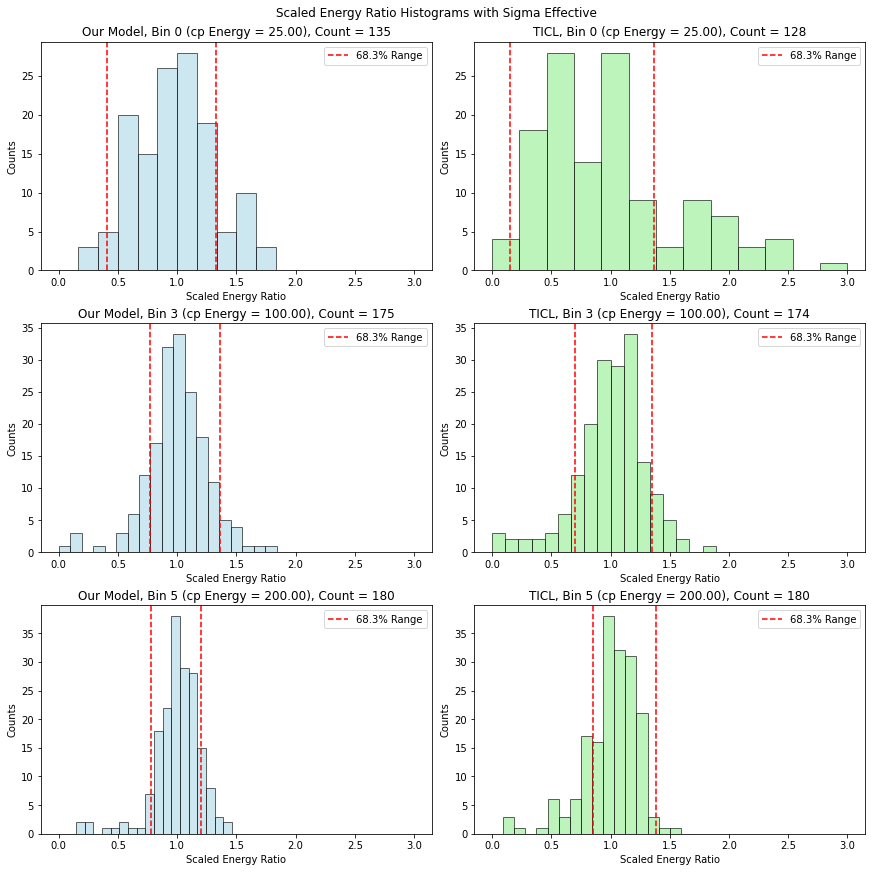

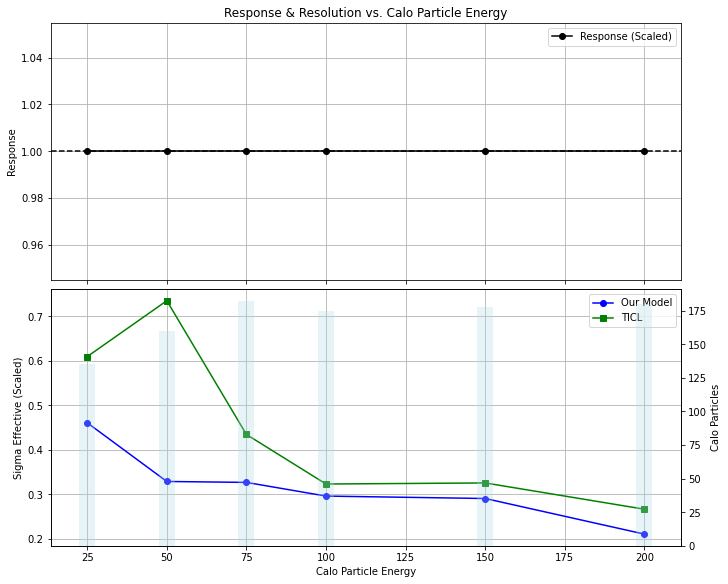

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define allowed energies for CaloParticles
allowed_energies = np.array([25, 50, 75, 100, 150, 200])

def process_cp_dataframe(df):
    """Convert columns to numeric and keep only events with exactly one calo particle id (selecting the row with highest shared_energy if needed)."""
    df = df.copy()
    for col in ['cp_id', 'cp_energy', 'energy_ratio', 'shared_energy']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # For each (event_index, cp_id), keep the row with the highest shared_energy.
    df_cp = df.loc[df.groupby(['event_index', 'cp_id'])['shared_energy'].idxmax()].reset_index(drop=True)
    
    # Only keep events that have exactly one unique cp_id.
    valid_events = df_cp.groupby('event_index')['cp_id'].nunique()
    valid_events = valid_events[valid_events == 1].index
    df_cp = df_cp[df_cp['event_index'].isin(valid_events)]
    
    return df_cp


df_CL_cp = process_cp_dataframe(df_CL)
df_TICL_cp = process_cp_dataframe(df_TICL)

# Map each cp_energy to a bin based on allowed energies
energy_to_bin = {energy: idx for idx, energy in enumerate(allowed_energies)}
df_CL_cp['energy_bin'] = df_CL_cp['cp_energy'].map(energy_to_bin)
df_TICL_cp['energy_bin'] = df_TICL_cp['cp_energy'].map(energy_to_bin)

def compute_scaled_sigma_effective(df, num_bins):
    """
    For each energy bin, scale the energy_ratio data so the mean is 1, then compute the sigma effective
    as the width of the narrowest window covering 68.3% of the data.
    """
    effective_mean_scaled, sigma_eff_scaled, counts = [], [], []
    for b in range(num_bins):
        bin_data = df.loc[df['energy_bin'] == b, 'energy_ratio'].dropna()
        counts.append(len(bin_data))
        if len(bin_data) > 0:
            mean_arith = np.mean(bin_data)
            scaled_data = bin_data / mean_arith
            sorted_data = np.sort(scaled_data)
            n_points = len(sorted_data)
            window_size = max(1, int(0.683 * n_points))
            min_width = np.inf
            best_range = (None, None)
            for i in range(n_points - window_size):
                width = sorted_data[i + window_size] - sorted_data[i]
                if width < min_width:
                    min_width = width
                    best_range = (sorted_data[i], sorted_data[i + window_size])
            mu_eff = (best_range[0] + best_range[1]) / 2 
            sigma_eff_val = (best_range[1] - best_range[0]) /np.sqrt(2)
            effective_mean_scaled.append(mu_eff)
            sigma_eff_scaled.append(sigma_eff_val)
        else:
            effective_mean_scaled.append(np.nan)
            sigma_eff_scaled.append(np.nan)
    return np.array(effective_mean_scaled), np.array(sigma_eff_scaled), np.array(counts)

n_bins = len(allowed_energies)
scaled_fitted_mean_CL, scaled_sigma_eff_CL, counts_CL = compute_scaled_sigma_effective(df_CL_cp, n_bins)
scaled_fitted_mean_TICL, scaled_sigma_eff_TICL, counts_TICL = compute_scaled_sigma_effective(df_TICL_cp, n_bins)

# Plot scaled histograms for selected bins
selected_bins = [0, n_bins // 2, n_bins - 1]
fig_hist, axs = plt.subplots(len(selected_bins), 2, figsize=(12, 4 * len(selected_bins)), constrained_layout=True)

for i, b in enumerate(selected_bins):
    for df, mean_scaled, sigma_scaled, label, color, ax in zip(
            [df_CL_cp, df_TICL_cp],
            [scaled_fitted_mean_CL, scaled_fitted_mean_TICL],
            [scaled_sigma_eff_CL, scaled_sigma_eff_TICL],
            ['Our Model', 'TICL'],
            ['lightblue', 'lightgreen'],
            axs[i] if len(selected_bins) > 1 else [axs]):
        
        bin_data = df.loc[df['energy_bin'] == b, 'energy_ratio'].dropna()
        if len(bin_data) > 0:
            mean_arith = np.mean(bin_data)
            scaled_data = bin_data / mean_arith
        else:
            scaled_data = bin_data
        
        ax.hist(scaled_data, bins='auto', range=(0, 3), color=color, alpha=0.6, edgecolor='k')
        ax.axvline(mean_scaled[b] - sigma_scaled[b], color='r', linestyle='--', label='68.3% Range')
        ax.axvline(mean_scaled[b] + sigma_scaled[b], color='r', linestyle='--')
        ax.set_title(f'{label}, Bin {b} (cp Energy = {allowed_energies[b]:.2f}), Count = {len(scaled_data)}')
        ax.set_xlabel('Scaled Energy Ratio')
        ax.set_ylabel('Counts')
        ax.legend()

plt.suptitle('Scaled Energy Ratio Histograms with Sigma Effective')
plt.show()

# Plot response (fixed at 1) and resolution vs. cp energy
fig_params, (ax_resp, ax_res) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, constrained_layout=True)
ax_resp.plot(allowed_energies, np.ones(n_bins), 'ko-', label='Response (Scaled)')
ax_resp.axhline(1, color='k', linestyle='--')
ax_resp.set_ylabel('Response')
ax_resp.set_title('Response & Resolution vs. Calo Particle Energy')
ax_resp.legend()
ax_resp.grid()

ax_res.plot(allowed_energies, scaled_sigma_eff_CL , 'bo-', label='Our Model')
ax_res.plot(allowed_energies, scaled_sigma_eff_TICL , 'gs-', label='TICL')
ax_res.set_xlabel('Calo Particle Energy')
ax_res.set_ylabel('Sigma Effective (Scaled)')
ax_res.legend()
ax_res.grid()

ax_res2 = ax_res.twinx()
ax_res2.bar(allowed_energies, counts_CL, width=5, color='lightblue', alpha=0.3)
ax_res2.set_ylabel('Calo Particles')

plt.show()


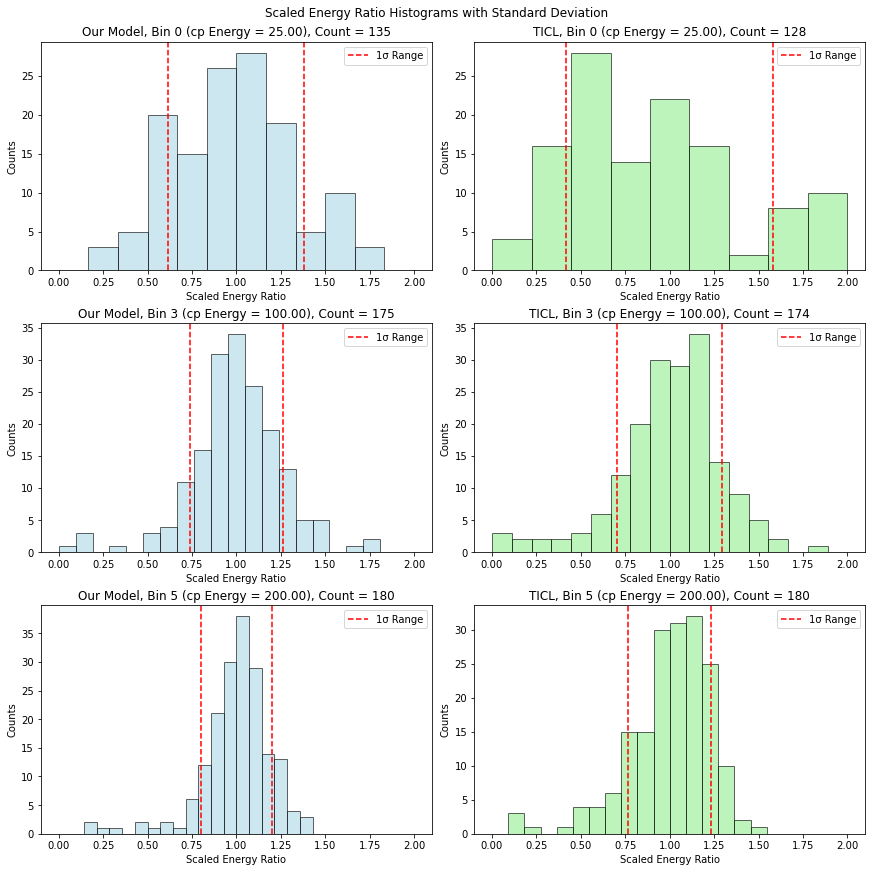

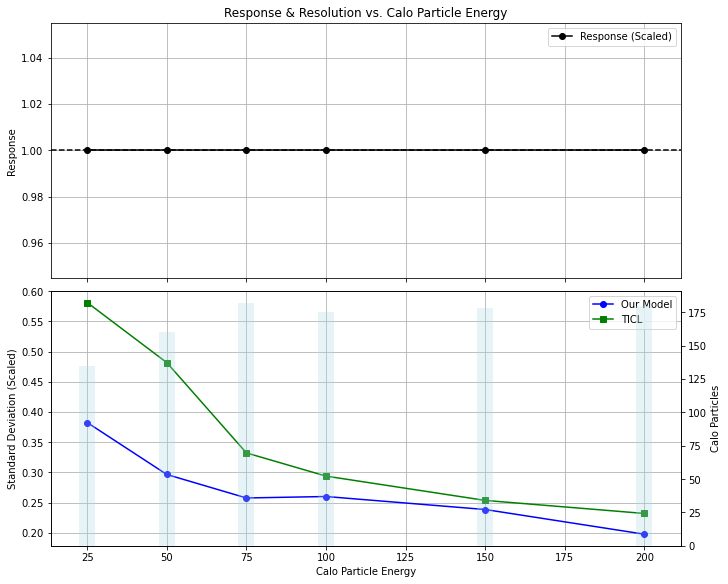

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define allowed energies for CaloParticles
allowed_energies = np.array([25, 50, 75, 100, 150, 200])

def process_cp_dataframe(df):
    """Convert columns to numeric and keep only events with exactly one calo particle id (selecting the row with highest shared_energy if needed)."""
    df = df.copy()
    for col in ['cp_id', 'cp_energy', 'energy_ratio', 'shared_energy']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # For each (event_index, cp_id), keep the row with the highest shared_energy.
    df_cp = df.loc[df.groupby(['event_index', 'cp_id'])['shared_energy'].idxmax()].reset_index(drop=True)
    
    # Only keep events that have exactly one unique cp_id.
    valid_events = df_cp.groupby('event_index')['cp_id'].nunique()
    valid_events = valid_events[valid_events == 1].index
    df_cp = df_cp[df_cp['event_index'].isin(valid_events)]
    
    return df_cp

df_CL_cp = process_cp_dataframe(df_CL)
df_TICL_cp = process_cp_dataframe(df_TICL)

# Map each cp_energy to a bin based on allowed energies
energy_to_bin = {energy: idx for idx, energy in enumerate(allowed_energies)}
df_CL_cp['energy_bin'] = df_CL_cp['cp_energy'].map(energy_to_bin)
df_TICL_cp['energy_bin'] = df_TICL_cp['cp_energy'].map(energy_to_bin)

def compute_scaled_sigma_effective(df, num_bins):
    """
    For each energy bin, scale the energy_ratio data so the mean is 1, then compute the standard deviation
    (using np.sqrt) of the scaled data.
    """
    effective_mean_scaled, sigma_eff_scaled, counts = [], [], []
    for b in range(num_bins):
        bin_data = df.loc[df['energy_bin'] == b, 'energy_ratio'].dropna()
        counts.append(len(bin_data))
        if len(bin_data) > 0:
            mean_arith = np.mean(bin_data)
            scaled_data = bin_data / mean_arith
            mu_eff = np.mean(scaled_data)
            sigma_eff_val = np.std(scaled_data)
            effective_mean_scaled.append(mu_eff)
            sigma_eff_scaled.append(sigma_eff_val)
        else:
            effective_mean_scaled.append(np.nan)
            sigma_eff_scaled.append(np.nan)
    return np.array(effective_mean_scaled), np.array(sigma_eff_scaled), np.array(counts)

n_bins = len(allowed_energies)
scaled_fitted_mean_CL, scaled_sigma_eff_CL, counts_CL = compute_scaled_sigma_effective(df_CL_cp, n_bins)
scaled_fitted_mean_TICL, scaled_sigma_eff_TICL, counts_TICL = compute_scaled_sigma_effective(df_TICL_cp, n_bins)

# Plot scaled histograms for selected bins
selected_bins = [0, n_bins // 2, n_bins - 1]
fig_hist, axs = plt.subplots(len(selected_bins), 2, figsize=(12, 4 * len(selected_bins)), constrained_layout=True)

for i, b in enumerate(selected_bins):
    for df, mean_scaled, sigma_scaled, label, color, ax in zip(
            [df_CL_cp, df_TICL_cp],
            [scaled_fitted_mean_CL, scaled_fitted_mean_TICL],
            [scaled_sigma_eff_CL, scaled_sigma_eff_TICL],
            ['Our Model', 'TICL'],
            ['lightblue', 'lightgreen'],
            axs[i] if len(selected_bins) > 1 else [axs]):
        
        bin_data = df.loc[df['energy_bin'] == b, 'energy_ratio'].dropna()
        if len(bin_data) > 0:
            mean_arith = np.mean(bin_data)
            scaled_data = bin_data / mean_arith
        else:
            scaled_data = bin_data
        
        ax.hist(scaled_data, bins='auto', range=(0, 2), color=color, alpha=0.6, edgecolor='k')
        ax.axvline(mean_scaled[b] - sigma_scaled[b], color='r', linestyle='--', label='1σ Range')
        ax.axvline(mean_scaled[b] + sigma_scaled[b], color='r', linestyle='--')
        ax.set_title(f'{label}, Bin {b} (cp Energy = {allowed_energies[b]:.2f}), Count = {len(scaled_data)}')
        ax.set_xlabel('Scaled Energy Ratio')
        ax.set_ylabel('Counts')
        ax.legend()

plt.suptitle('Scaled Energy Ratio Histograms with Standard Deviation')
plt.show()

# Plot response (fixed at 1) and resolution vs. cp energy
fig_params, (ax_resp, ax_res) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, constrained_layout=True)
ax_resp.plot(allowed_energies, np.ones(n_bins), 'ko-', label='Response (Scaled)')
ax_resp.axhline(1, color='k', linestyle='--')
ax_resp.set_ylabel('Response')
ax_resp.set_title('Response & Resolution vs. Calo Particle Energy')
ax_resp.legend()
ax_resp.grid()

ax_res.plot(allowed_energies, scaled_sigma_eff_CL , 'bo-', label='Our Model')
ax_res.plot(allowed_energies, scaled_sigma_eff_TICL , 'gs-', label='TICL')
ax_res.set_xlabel('Calo Particle Energy')
ax_res.set_ylabel('Standard Deviation (Scaled)')
ax_res.legend()
ax_res.grid()

ax_res2 = ax_res.twinx()
ax_res2.bar(allowed_energies, counts_CL, width=5, color='lightblue', alpha=0.3)
ax_res2.set_ylabel('Calo Particles')

plt.show()
